<b>Importing the libraries</b>

In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

<b>Simple QC based RNG</b>

Initially, let us define a simple Quantum Computer based Random Number Generator. It consists of n-qubits, prepared into a superposition by using Hadamard gates, and finally measured.

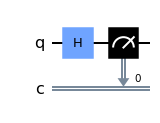

In [2]:
def simpleQCRNG(n):
        
        qc = QuantumCircuit(n, n, name = 'simpleQCRNG')
        
        qc.h(range(n))
        
        qc.measure(range(n), range(n))
            
        return qc
    
simpleQCRNG(1).draw('mpl')

<b>Running on Simulators</b>

We will first run our simple RNG on a simulator using 1 and 4 qubits and different number of trials, just to verify the operation of our circuit. Then, we will run it on an actual quantum computer provided by IBM Quantum Experience to ascertain the effects of noise on this random number generation process

In [3]:
def printStats(numCount, num, n, nShots):
    
        print('Standard Deviation of the distribution of', num,'is: ', statistics.stdev(numCount))
        print('Estimated Mean of the distribution of', num,'is: ', statistics.mean(numCount))
        print('Expected Mean of the distribution of', num,'is: ', nShots/(2**n))
        print('-----------------------------------------------------------\n\n')
        
        

In [4]:
def plotSimulation(allCounts, n, nTrials, nShots):

    import random
    
    marker = [',', '+', '.', 'o', '*', 'v', '^', '<', '>', '|'] 
    color = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    for num in range(2**n):
        plt.plot(range(1, nTrials + 1), allCounts[num], marker = random.choice(marker), markerfacecolor = random.choice(color), label = str(num))
        plt.title('Distribution of the number of times given state is obtained')
        plt.xlabel('Trial Number')
        plt.ylabel('Number of times given state is obtained')
        
        printStats(allCounts[num], num, n, nShots)
    
    plt.legend(loc = 'upper right')
    plt.show()
    

In [5]:
def runSimulation(n, nTrials, nShots, simulator):     

    allCounts = [[] for _ in range(2**n)]
    
    for trial in range(nTrials):
        qc = simpleQCRNG(n)
        counts = execute(qc, backend=simulator, shots=nShots).result().get_counts(qc)
        
        num = 0
        for value in counts.values():
            allCounts[num].append(value)
            num += 1
    
    plotSimulation(allCounts, n, nTrials, nShots)
    
    

Standard Deviation of the distribution of 0 is:  11.29847580674294
Estimated Mean of the distribution of 0 is:  499.9
Expected Mean of the distribution of 0 is:  500.0
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  11.29847580674294
Estimated Mean of the distribution of 1 is:  500.1
Expected Mean of the distribution of 1 is:  500.0
-----------------------------------------------------------




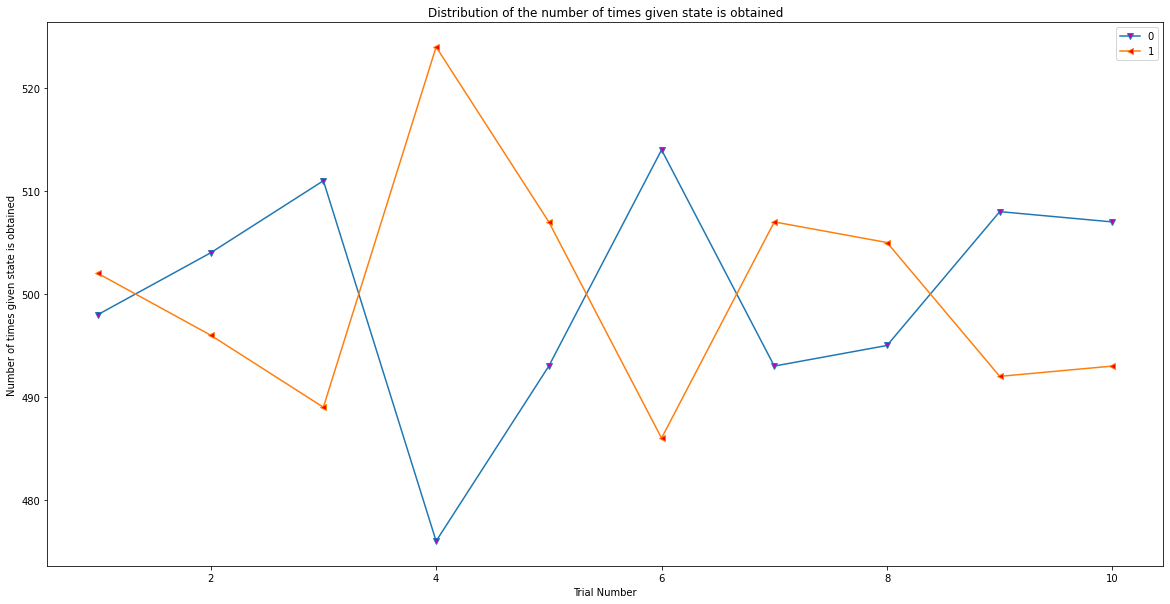

In [6]:
simulator = Aer.get_backend('qasm_simulator')

runSimulation(1, 10, 1000, simulator)

Standard Deviation of the distribution of 0 is:  14.238498814300913
Estimated Mean of the distribution of 0 is:  497.75
Expected Mean of the distribution of 0 is:  500.0
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  14.238498814300913
Estimated Mean of the distribution of 1 is:  502.25
Expected Mean of the distribution of 1 is:  500.0
-----------------------------------------------------------




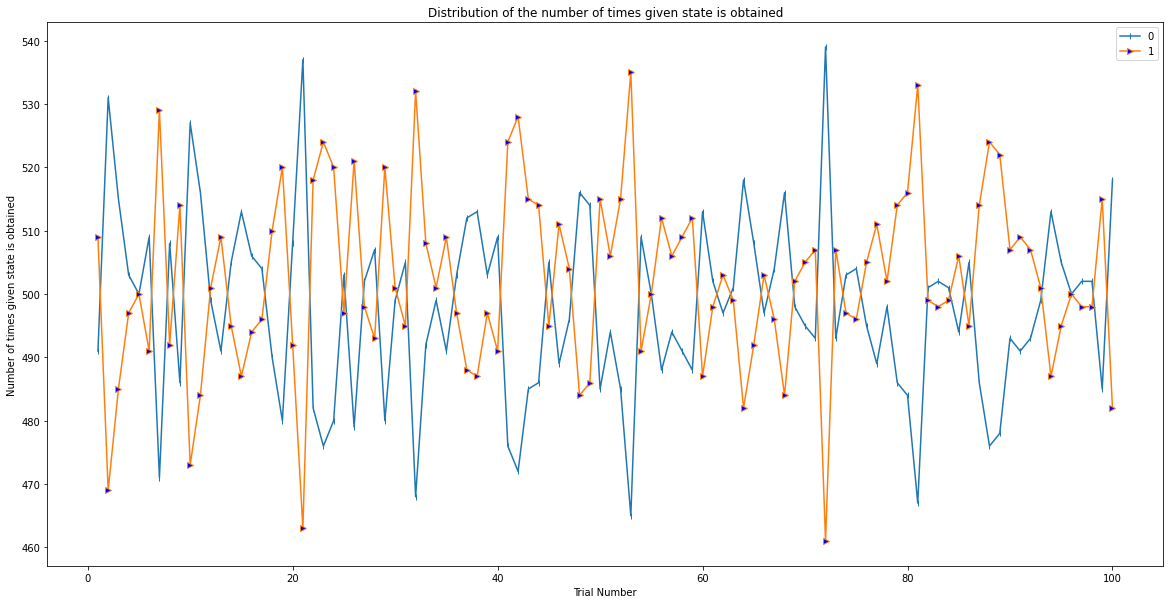

In [7]:
runSimulation(1, 100, 1000, simulator)

Standard Deviation of the distribution of 0 is:  15.981588975636502
Estimated Mean of the distribution of 0 is:  500.115
Expected Mean of the distribution of 0 is:  500.0
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  15.981588975636502
Estimated Mean of the distribution of 1 is:  499.885
Expected Mean of the distribution of 1 is:  500.0
-----------------------------------------------------------




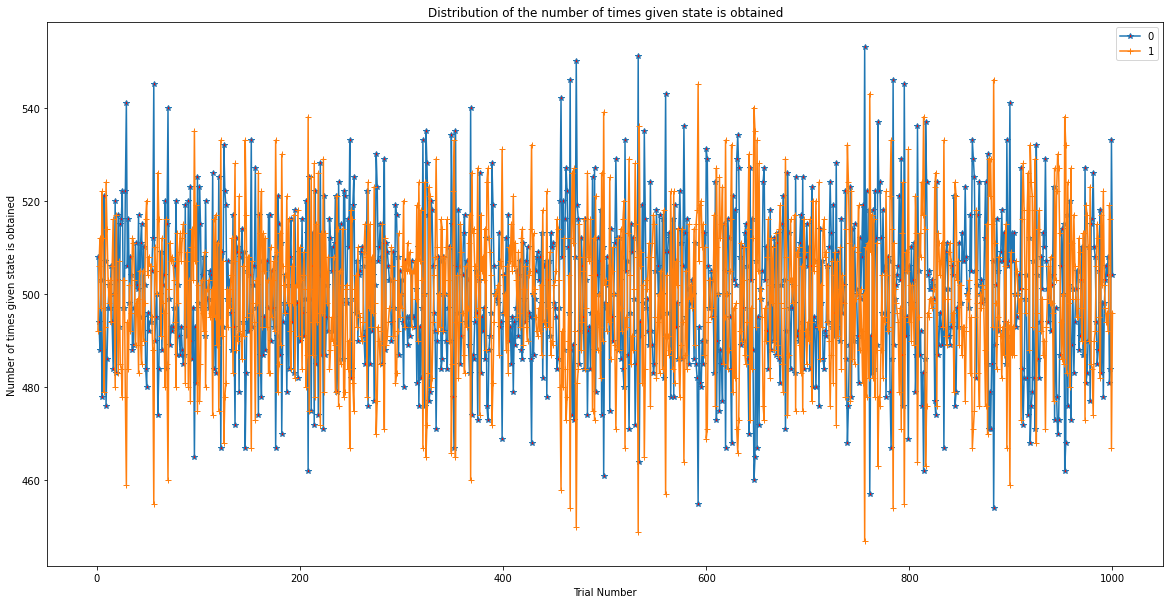

In [8]:
runSimulation(1, 1000, 1000, simulator)

We can observe that the estimated mean of all the trials for all the three experiments is close to the expected mean. In accordance with the law of large numbers, this mean approaches the expected mean as the number of trials increases. The standard deviation, and hence the variance, remains around 15 for all trials. 

Now, let us try running the simulation for 4 qubits, for 10 and 100 trials, respectively.

Standard Deviation of the distribution of 0 is:  7.519604008486381
Estimated Mean of the distribution of 0 is:  59.1
Expected Mean of the distribution of 0 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  7.183313998427188
Estimated Mean of the distribution of 1 is:  57.4
Expected Mean of the distribution of 1 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 2 is:  5.1650535116083525
Estimated Mean of the distribution of 2 is:  64.3
Expected Mean of the distribution of 2 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 3 is:  10.47748909700114
Estimated Mean of the distribution of 3 is:  60
Expected Mean of the distribution of 3 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 4 is:  10.32203683603408
Estimated Mean of the 

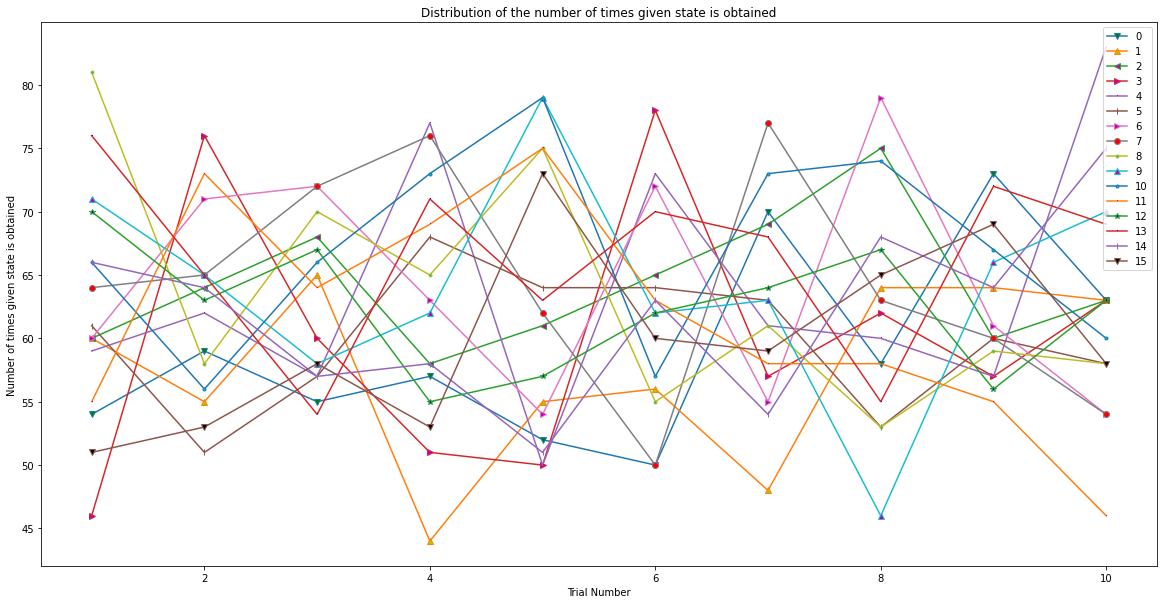

In [9]:
runSimulation(4, 10, 1000, simulator)

Standard Deviation of the distribution of 0 is:  7.545812940253219
Estimated Mean of the distribution of 0 is:  61.01
Expected Mean of the distribution of 0 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  7.218970518954579
Estimated Mean of the distribution of 1 is:  61.74
Expected Mean of the distribution of 1 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 2 is:  7.730792424787482
Estimated Mean of the distribution of 2 is:  61.65
Expected Mean of the distribution of 2 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 3 is:  8.331581634074801
Estimated Mean of the distribution of 3 is:  62.17
Expected Mean of the distribution of 3 is:  62.5
-----------------------------------------------------------


Standard Deviation of the distribution of 4 is:  7.410748404796368
Estimated Mean of

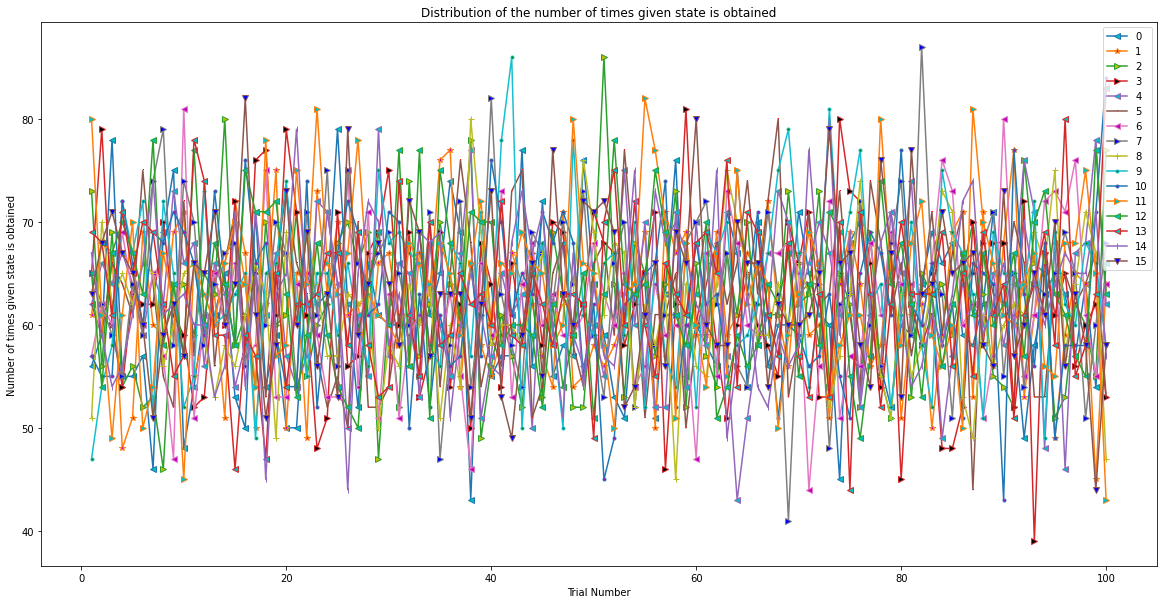

In [10]:
runSimulation(4, 100, 1000, simulator)

We observe similar results for 4 qubits, with a smaller value of standard deviation.

<b>Running on an actual Quantum Computer</b>

We will only run a few trials, since running a large number of trials would be uneconomical in terms of time consumption. However, we will use a large number of shots, since it would reduce the effect of random errors and help in the identification of systematic errors.

In [13]:
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble

#IBMQ.save_account()
IBMQ.load_account() # Load account from disk

provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_santiago')

ibmqfactory.load_account:WARNING:2021-08-08 06:15:11,752: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
def runRealNoisy(n, nShots, simulator):     

    qc = simpleQCRNG(n)
    counts = execute(qc, backend=simulator, shots=nShots).result().get_counts(qc)
    
    return counts



def processNoisy(counts, n, nShots):

    allCounts = [[] for _ in range(2**n)]
    nTrials = 1
    num = 0
    for value in counts.values():
        allCounts[num].append(value)
        num += 1
    
    import random
    
    marker = [',', '+', '.', 'o', '*', 'v', '^', '<', '>', '|'] 
    color = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    for num in range(2**n):
        
        print('Expected Mean of the distribution of', num,'is: ', nShots/(2**n))
        print('-----------------------------------------------------------\n\n')
        
        plt.plot(range(1, nTrials + 1), allCounts[num], marker = random.choice(marker), markerfacecolor = random.choice(color), label = str(num))
        plt.title('Distribution of the number of times given state is obtained')
        plt.xlabel('Trial Number')
        plt.ylabel('Number of times given state is obtained')
        
    plt.legend(loc = 'upper right')
    plt.show()
    

In [19]:
allCounts = runRealNoisy(1, 8192, backend)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




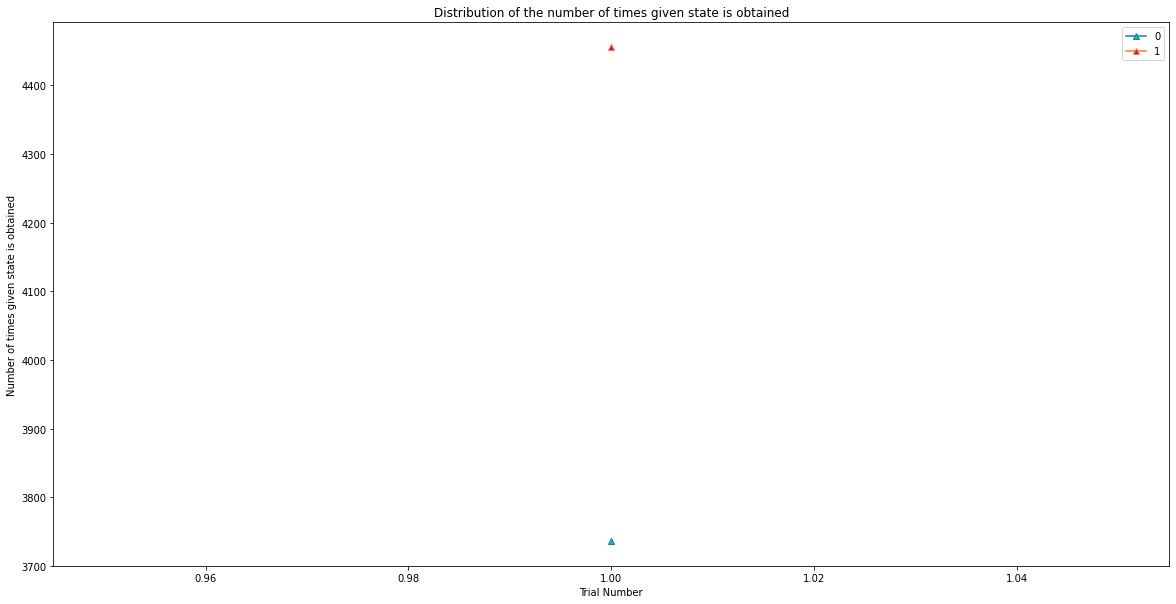

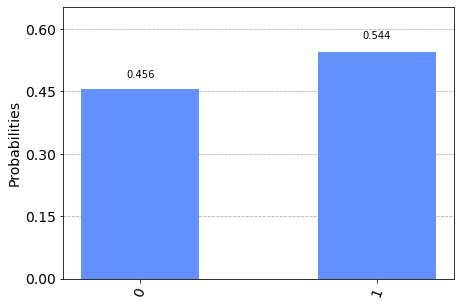

In [30]:
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




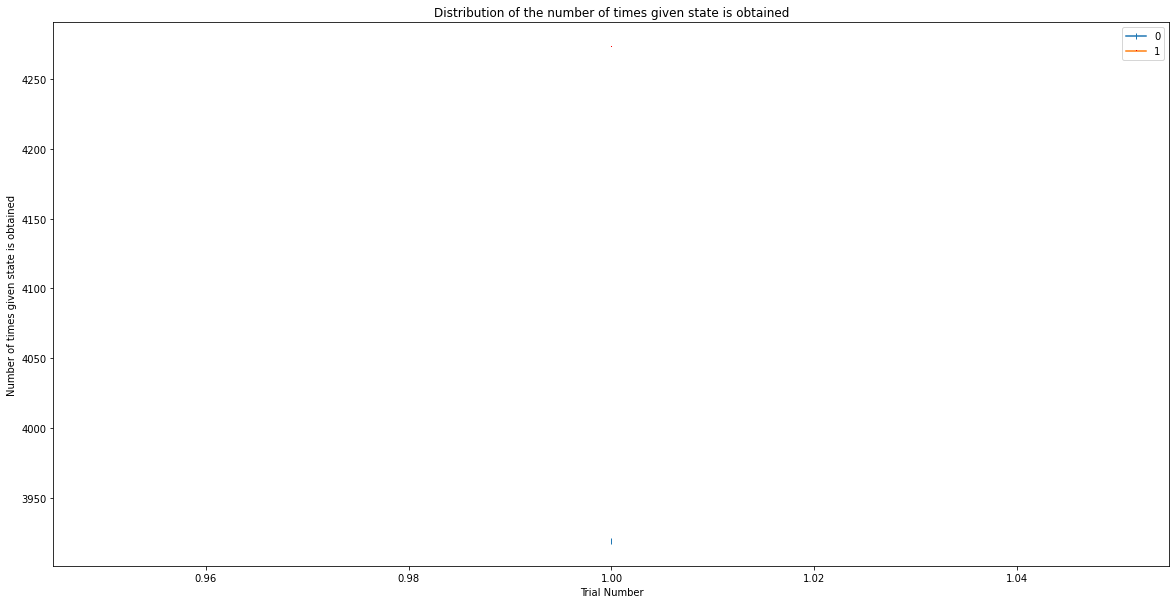

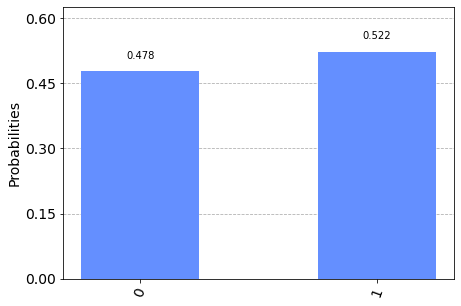

In [35]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




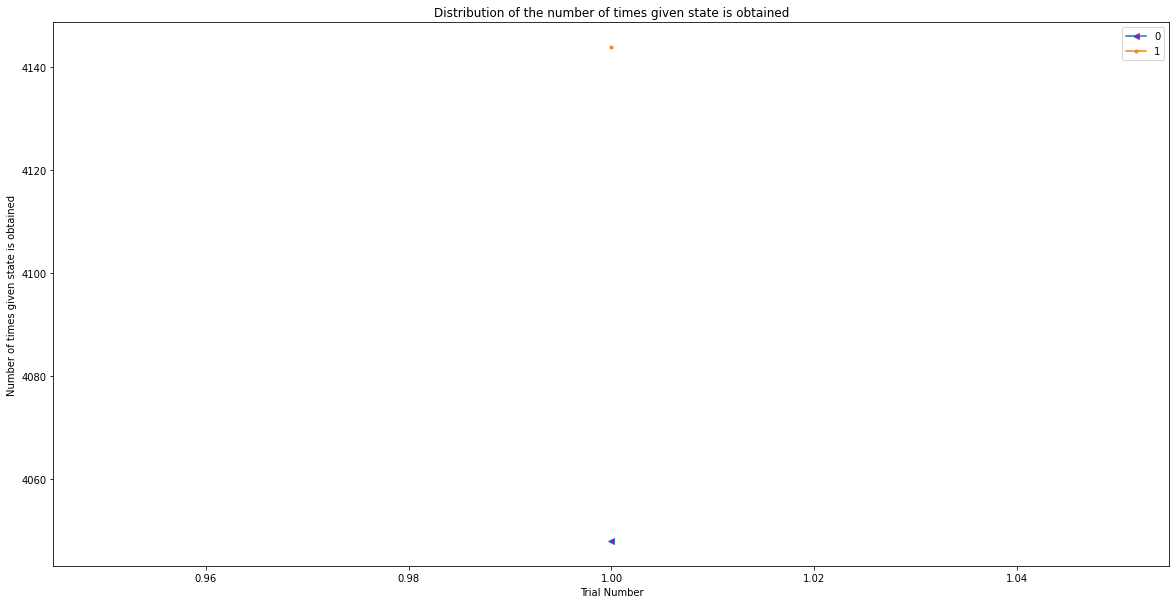

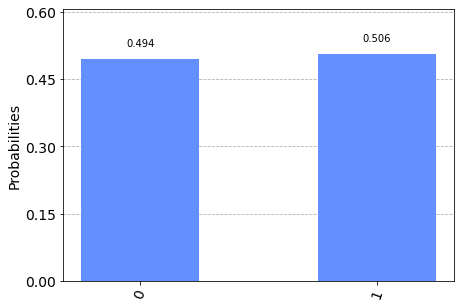

In [37]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




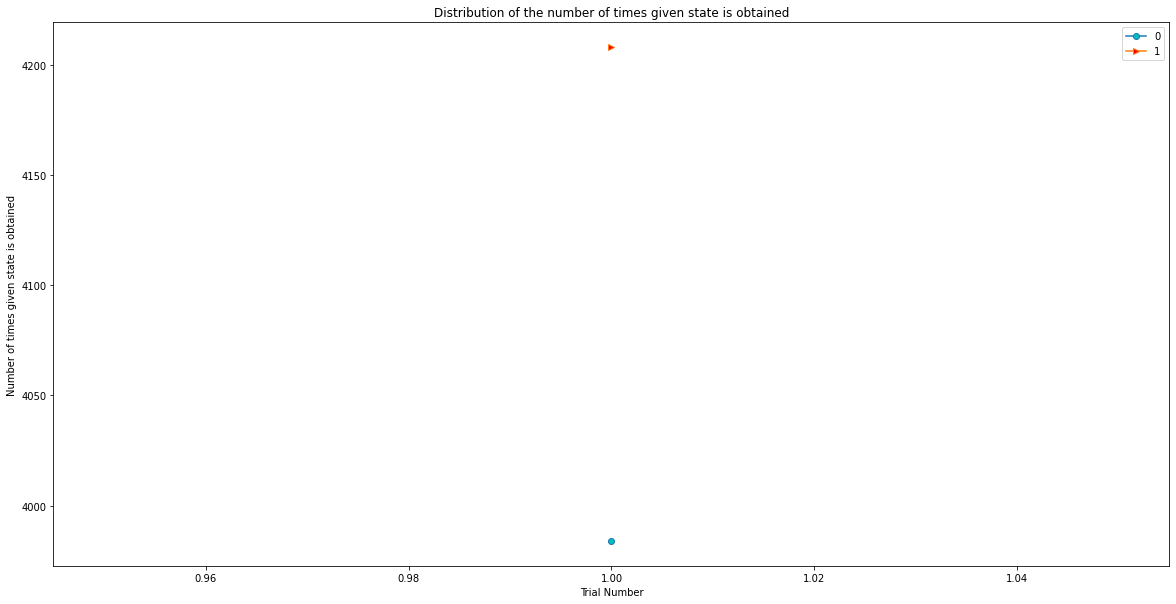

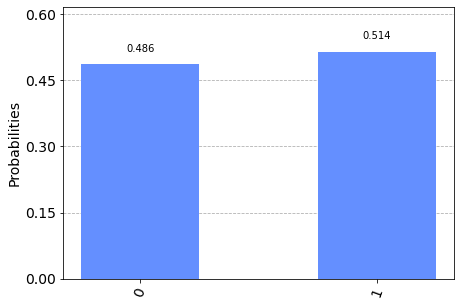

In [38]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




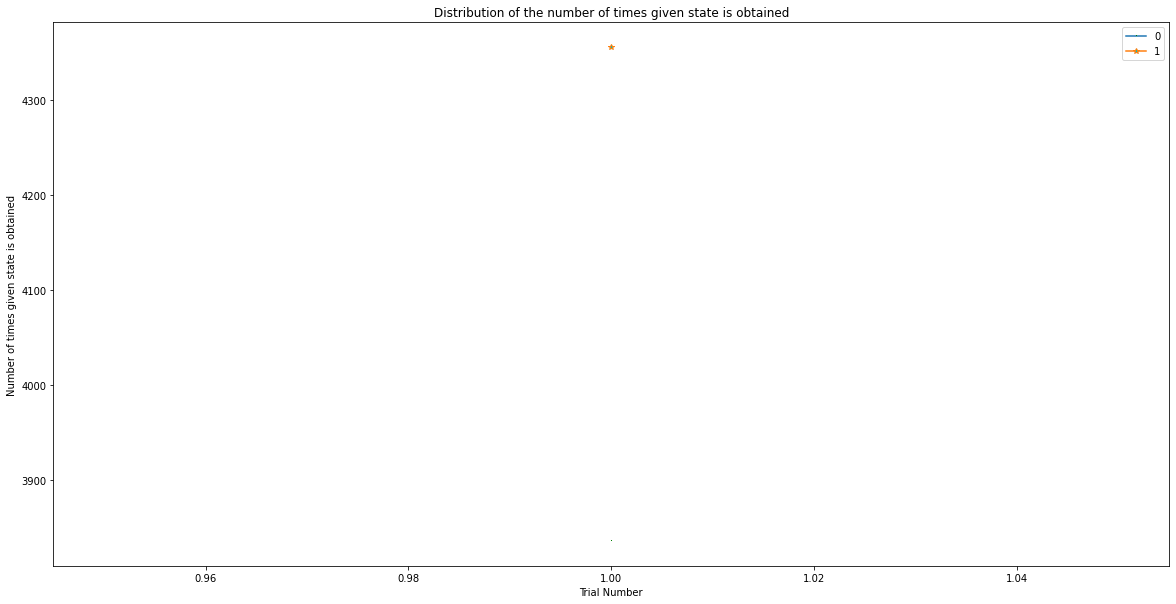

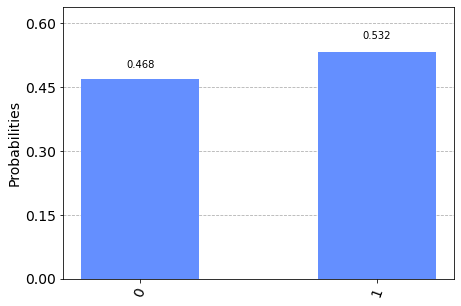

In [39]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




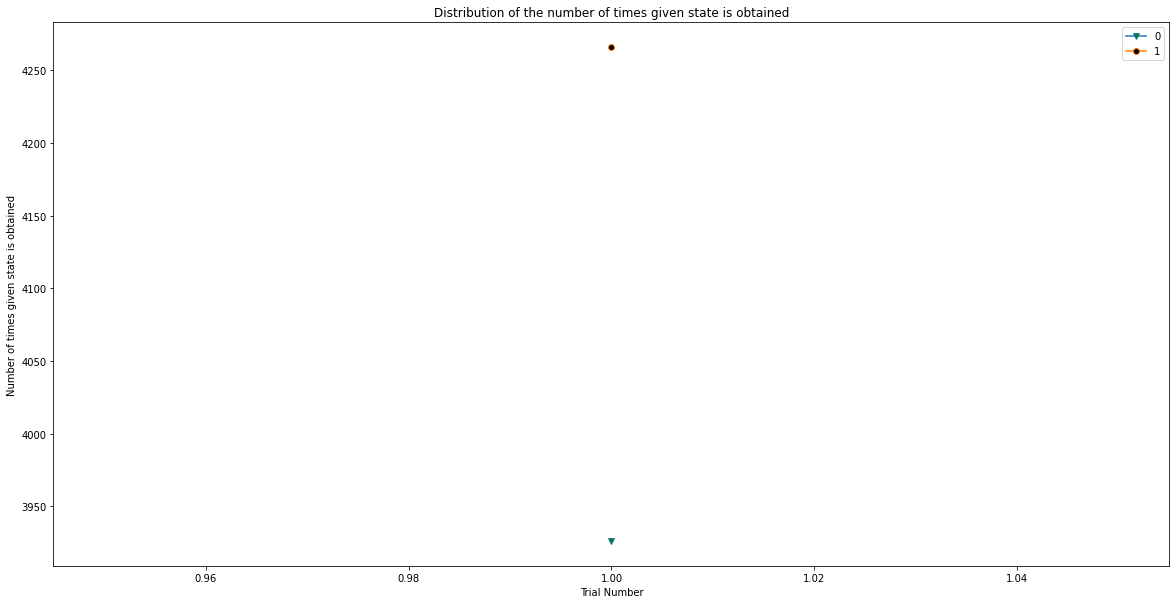

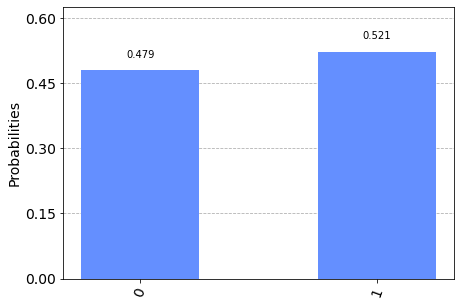

In [40]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




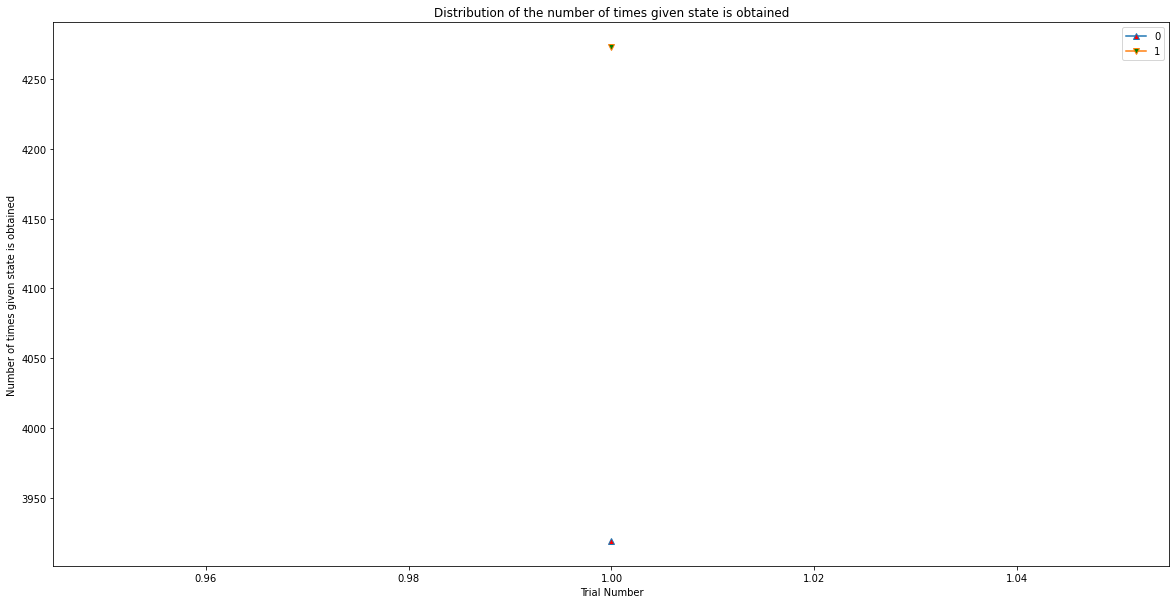

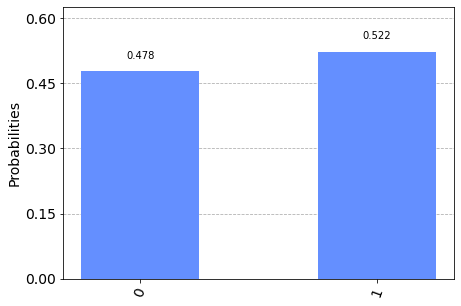

In [41]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




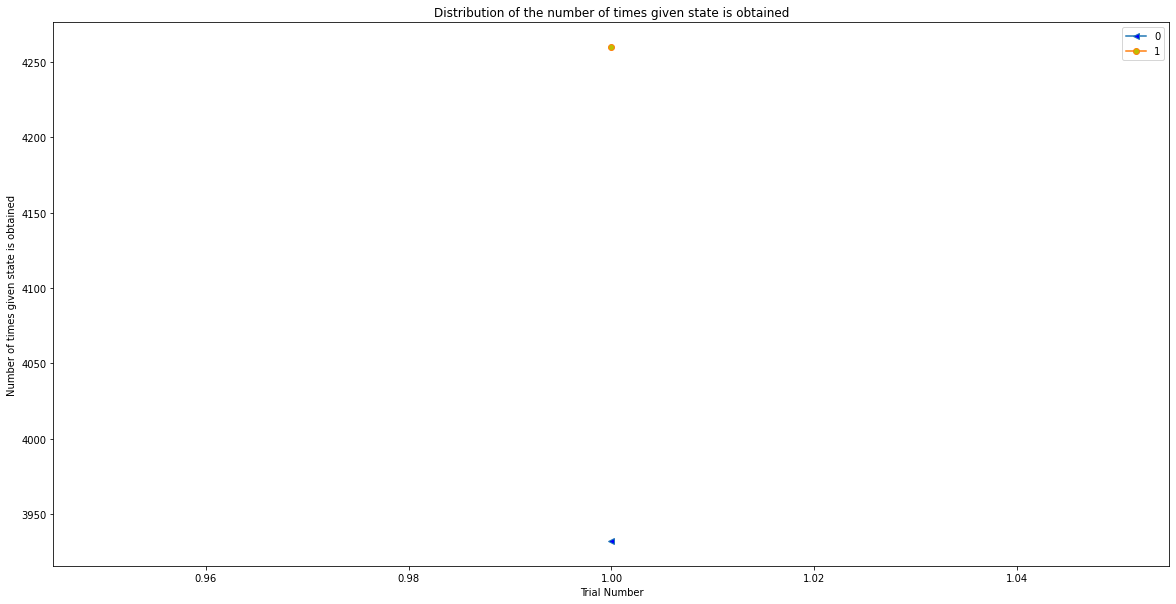

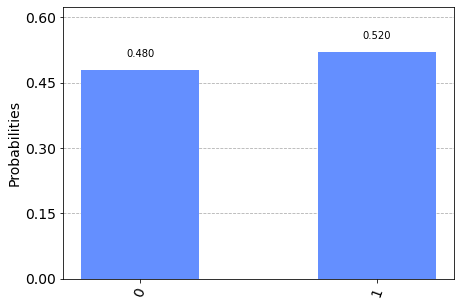

In [42]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




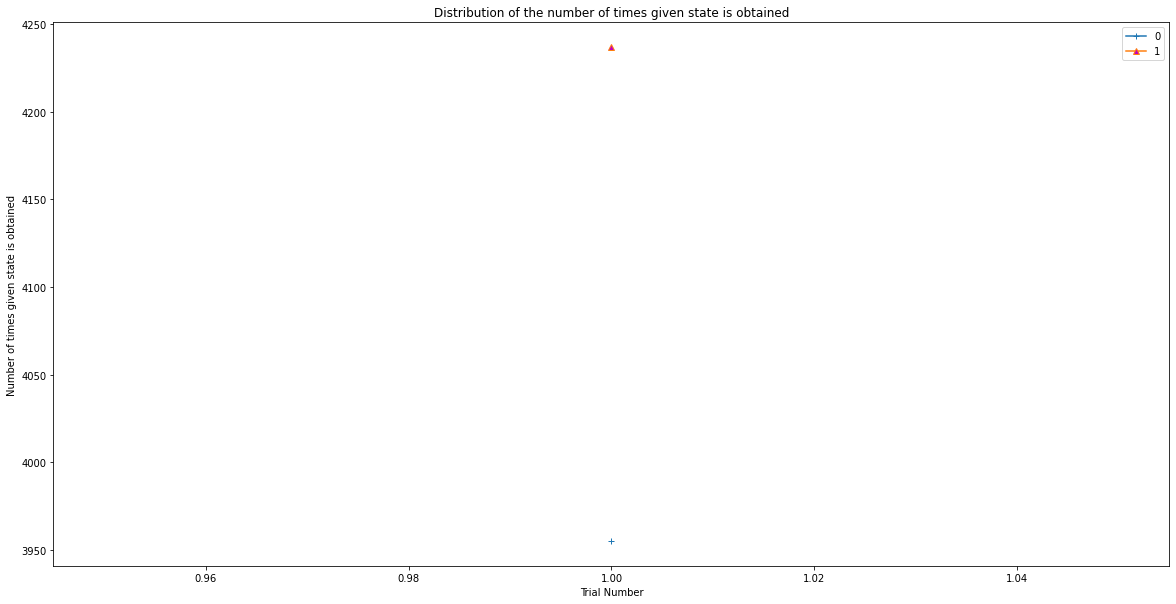

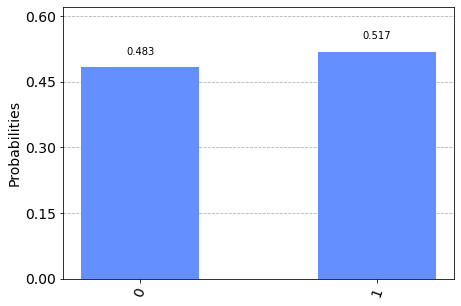

In [43]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  4096.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  4096.0
-----------------------------------------------------------




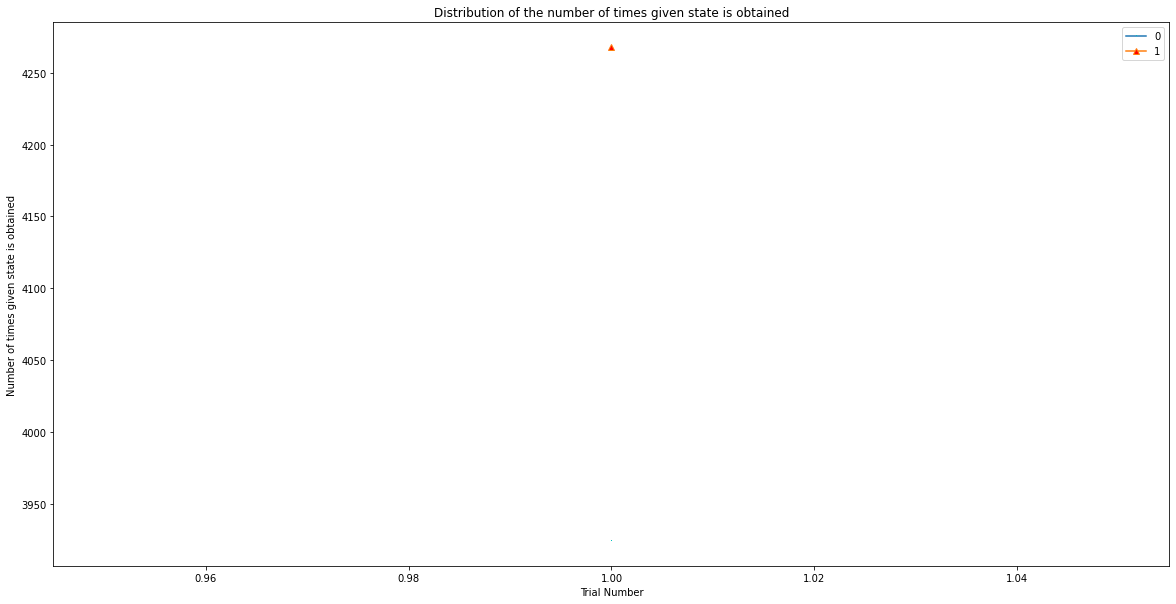

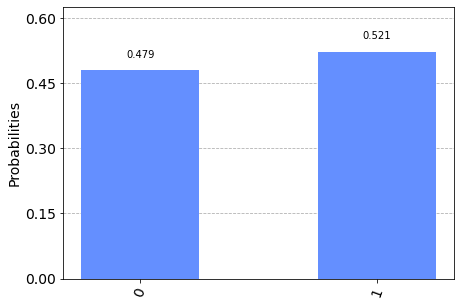

In [44]:
allCounts = runRealNoisy(1, 8192, backend)
processNoisy(allCounts, 1, 8192)
plot_histogram(allCounts)

In [49]:
oneCounts = [0.544, 0.522, 0.506, 0.514, 0.532, 0.521, 0.522, 0.520, 0.517, 0.521]
print('The mean of the probability of 1s obtained is:', statistics.mean(oneCounts))
print('The standard deviation in the probability of 1s obtained is:', statistics.stdev(oneCounts))
print('\nWe can say that the probability of obtaining 1 on the IBM Santiago computer is', statistics.mean(oneCounts), '+/-', 1.5*statistics.stdev(oneCounts), 'with a confidence of 95%, based on our 10 runs.')

The mean of the probability of 1s obtained is: 0.5219
The standard deviation in the probability of 1s obtained is: 0.01019204482808911

We can say that the probability of obtaining 1 on the IBM Santiago computer is 0.5219 +/- 0.015288067242133666 with a confidence of 95%, based on our 10 runs.


From the above results, we can see that the IBM Santiago machine seems to be a bit biased towards obtaining '1', as the counts of '1' are greater than the counts of '0' in each of the 10 cases. 

Now, let us run jobs for the 4-qubit RNG

In [ ]:
allCounts = runRealNoisy(4, 8192, backend)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

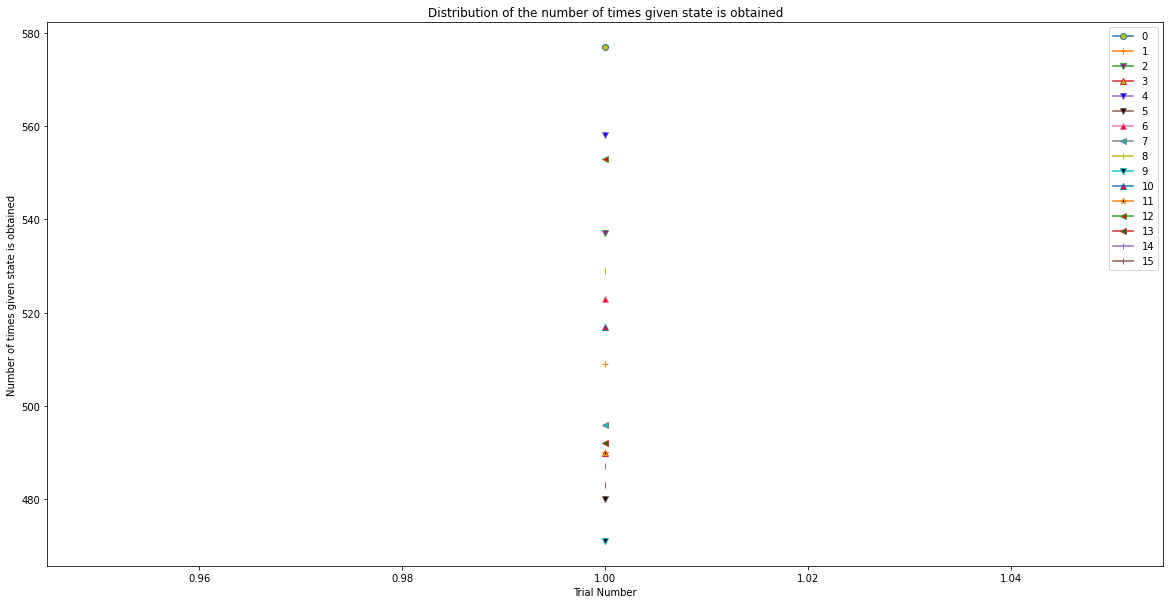

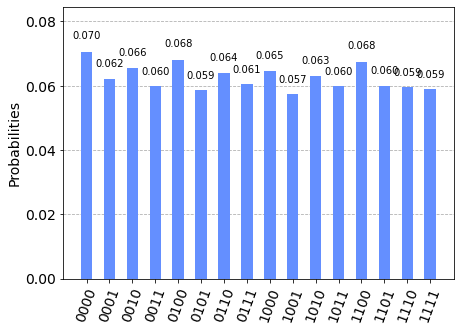

In [ ]:
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

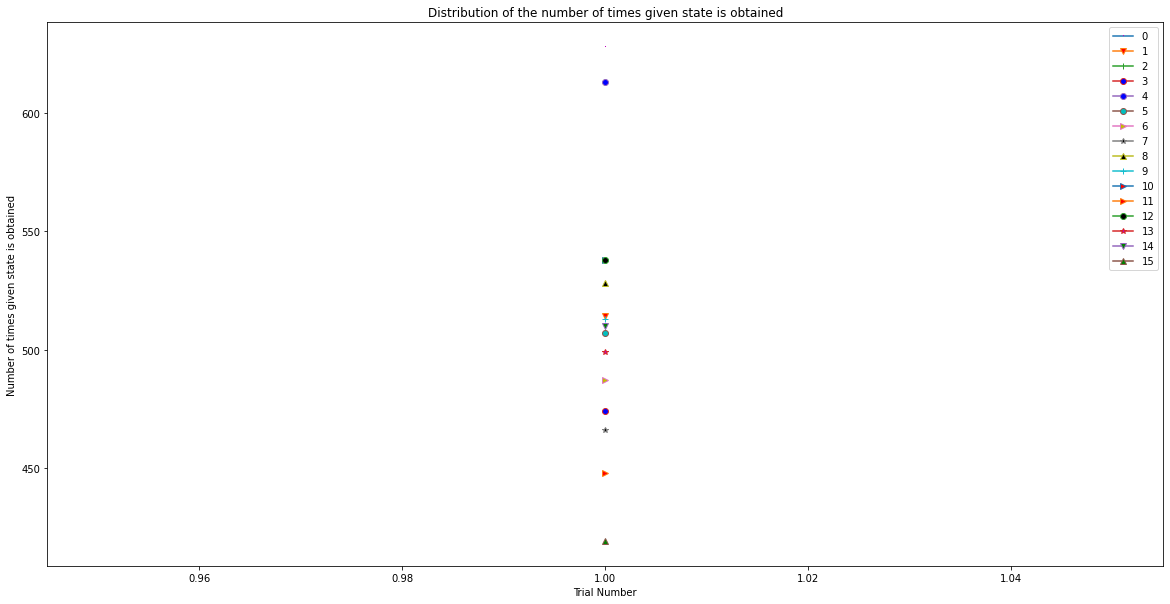

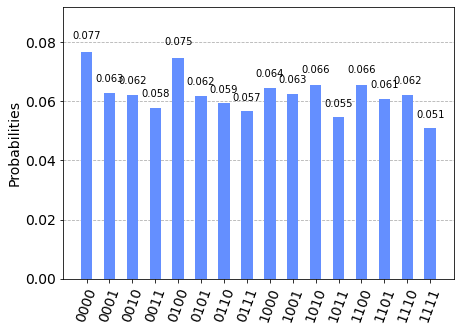

In [36]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

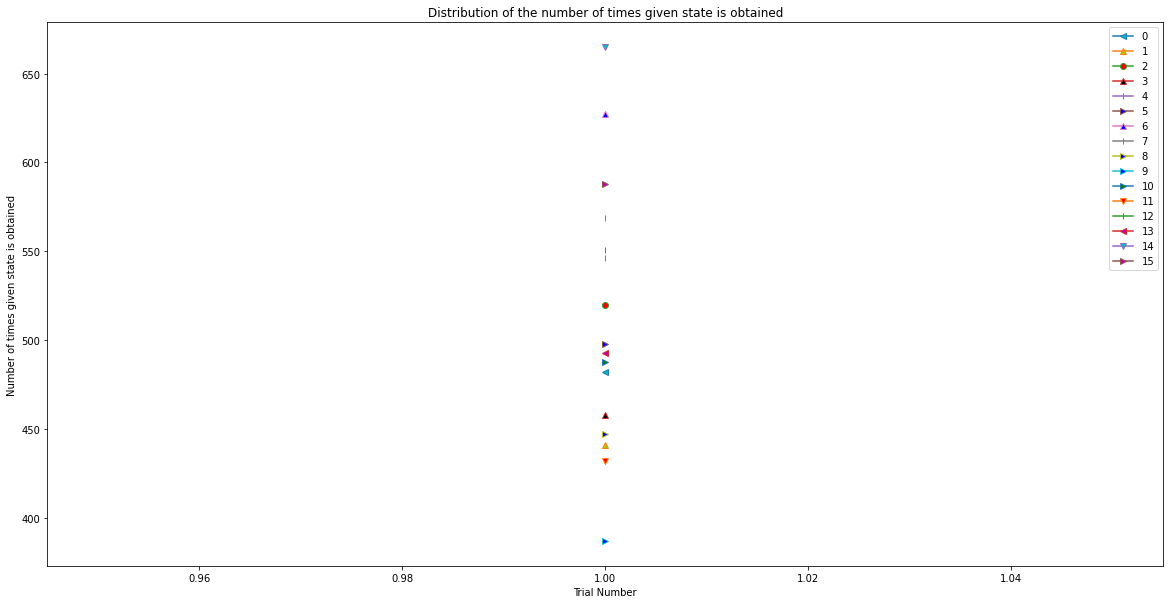

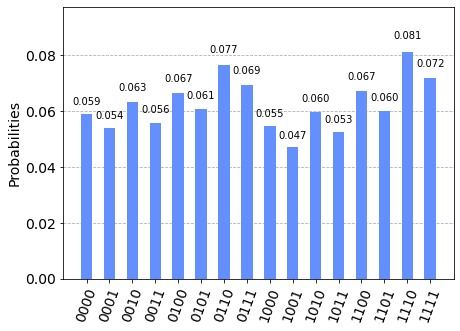

In [50]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

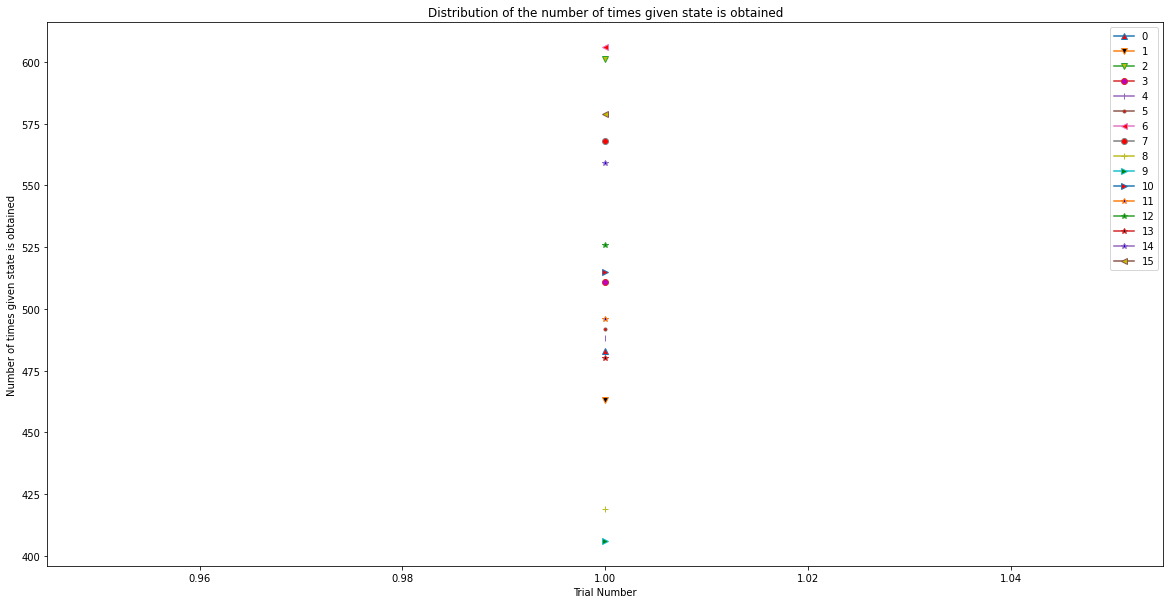

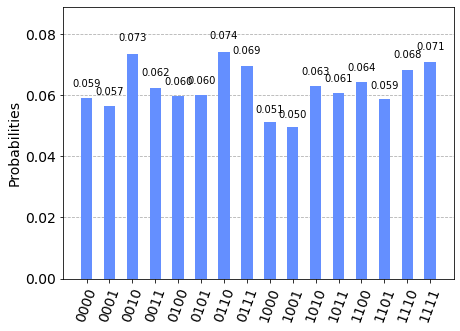

In [51]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

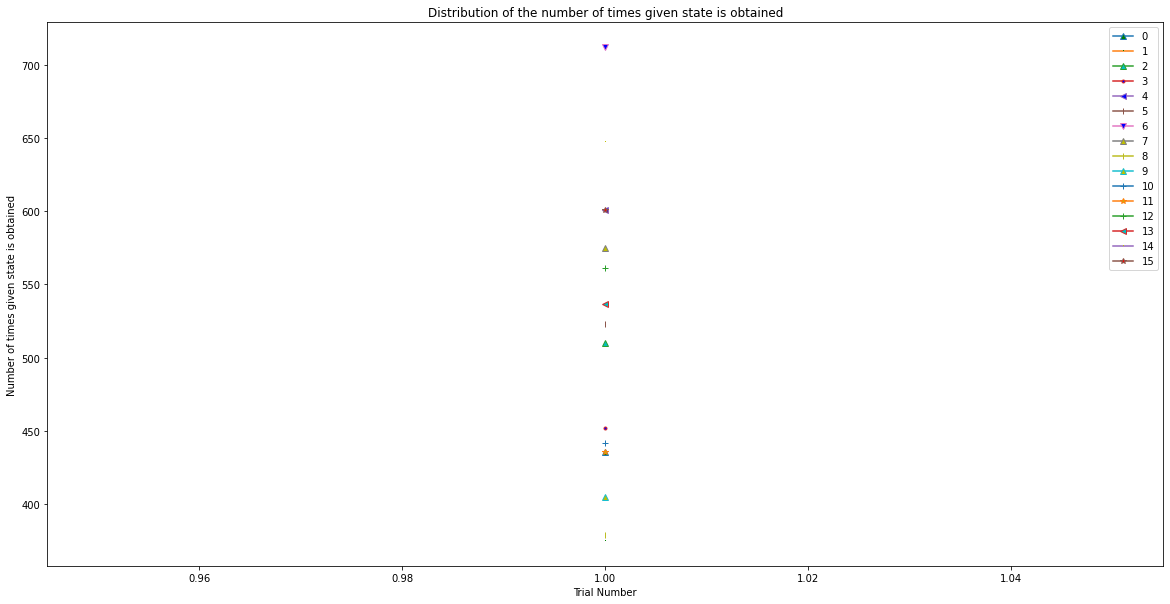

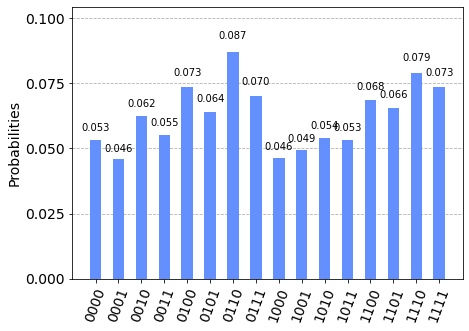

In [52]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

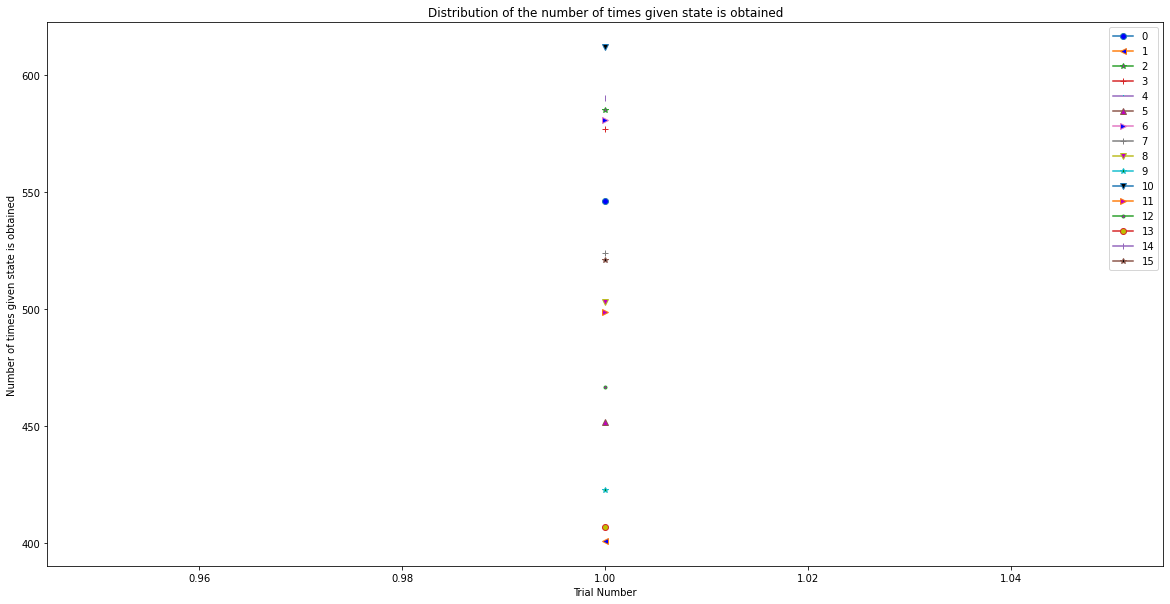

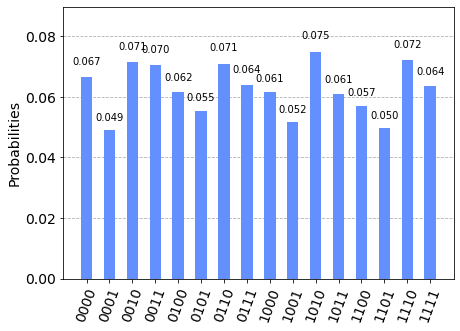

In [53]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

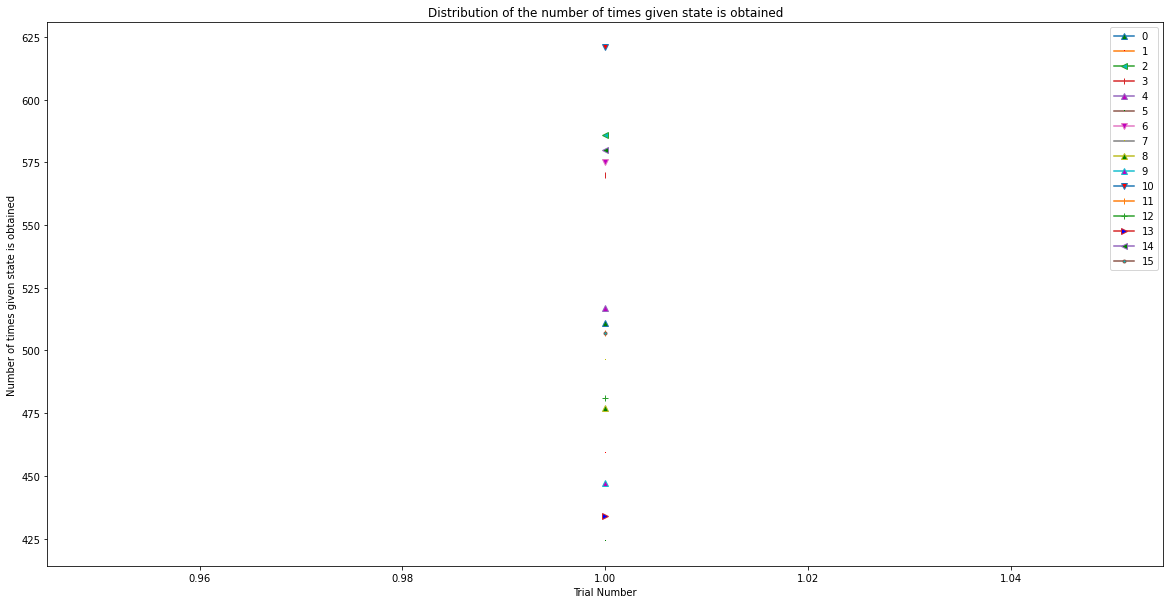

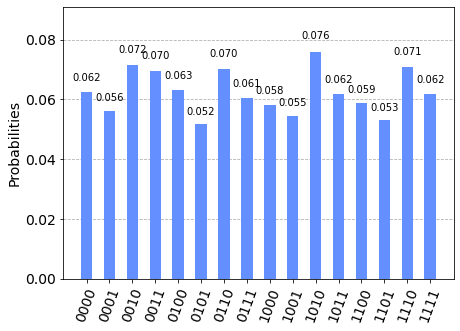

In [54]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

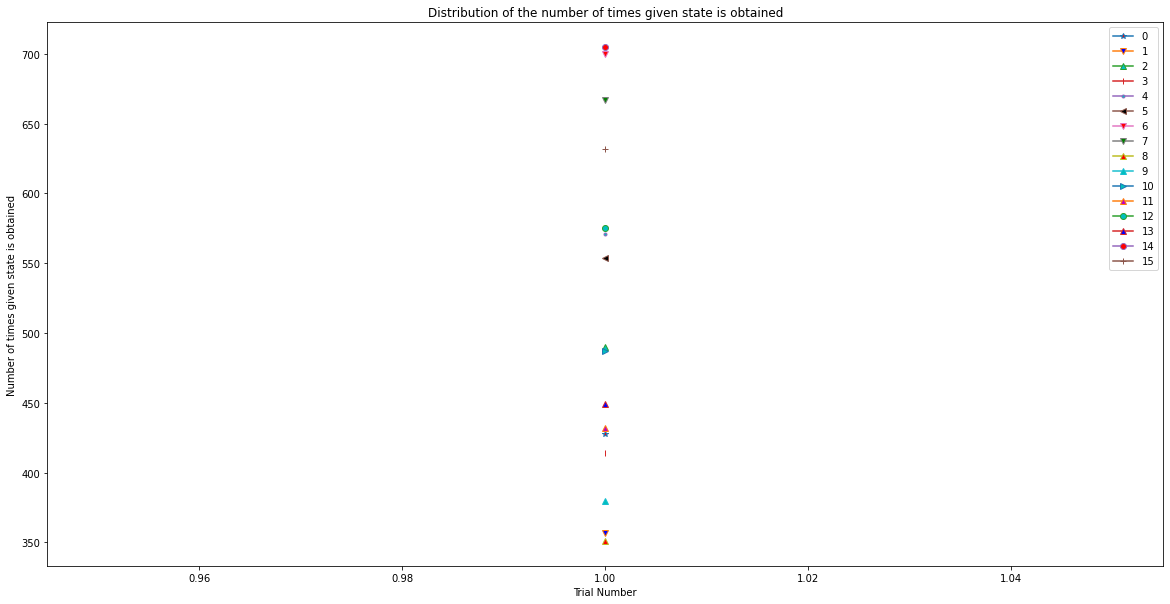

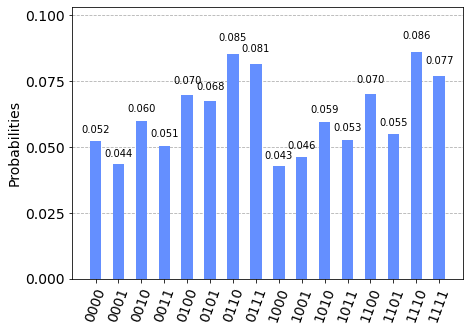

In [55]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

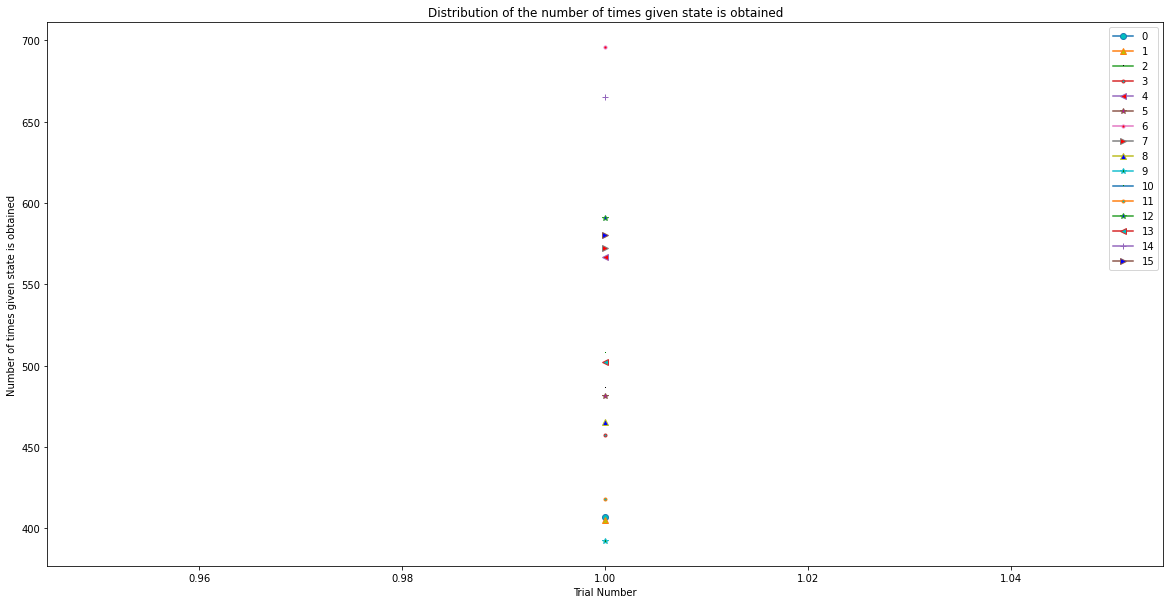

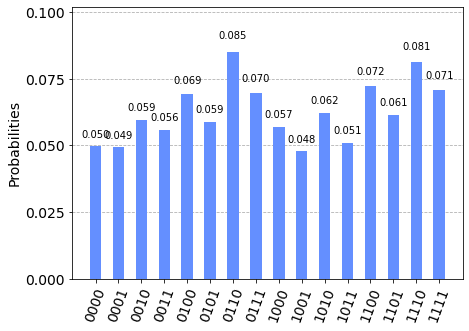

In [56]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 4 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 5 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 6 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 7 is:  512.0
-----------------------------------------------------------


Expected Mean of the distribution of 8 is:  512.0
------------------------------------------------------

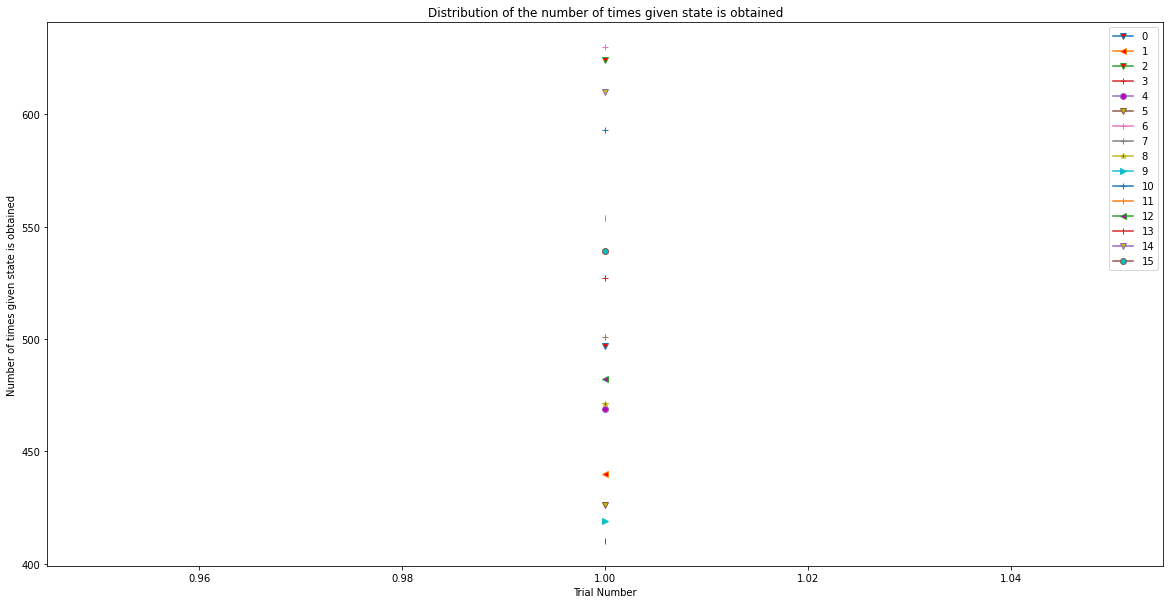

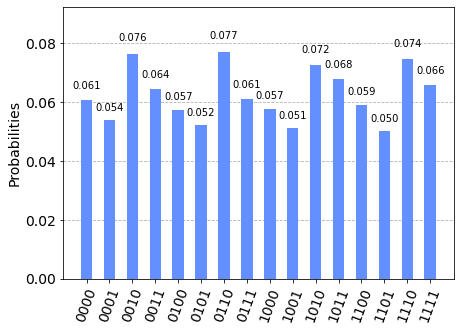

In [57]:
allCounts = runRealNoisy(4, 8192, backend)
processNoisy(allCounts, 4, 8192)
plot_histogram(allCounts)

The trends in the above plots are a bit difficult to ascertain. Let us organise the data into a more usable form. (A large part of code in this section can be reduced, and data-processing automated, but the jobs have already been run by now :( )

In [59]:
allCounts = [[0.070, 0.077, 0.059, 0.059, 0.053, 0.067, 0.062, 0.052, 0.050, 0.061],
             [0.062, 0.063, 0.054, 0.057, 0.046, 0.049, 0.056, 0.044, 0.049, 0.054],
             [0.066, 0.062, 0.063, 0.073, 0.062, 0.071, 0.077, 0.060, 0.059, 0.076],
             [0.060, 0.058, 0.056, 0.062, 0.055, 0.070, 0.070, 0.051, 0.056, 0.064],
             [0.068, 0.075, 0.067, 0.060, 0.073, 0.062, 0.063, 0.070, 0.069, 0.057],
             [0.059, 0.062, 0.061, 0.060, 0.064, 0.055, 0.052, 0.068, 0.059, 0.052],
             [0.064, 0.059, 0.077, 0.074, 0.087, 0.071, 0.070, 0.085, 0.085, 0.077],
             [0.061, 0.057, 0.069, 0.069, 0.070, 0.064, 0.061, 0.081, 0.070, 0.061],
             [0.065, 0.064, 0.055, 0.051, 0.046, 0.061, 0.058, 0.043, 0.057, 0.057],
             [0.057, 0.063, 0.047, 0.050, 0.049, 0.052, 0.055, 0.046, 0.048, 0.051],
             [0.063, 0.066, 0.060, 0.063, 0.054, 0.075, 0.076, 0.059, 0.062, 0.072],
             [0.060, 0.055, 0.053, 0.061, 0.053, 0.061, 0.062, 0.053, 0.051, 0.068],
             [0.068, 0.066, 0.067, 0.064, 0.068, 0.057, 0.059, 0.070, 0.072, 0.059],
             [0.060, 0.061, 0.060, 0.059, 0.066, 0.050, 0.053, 0.055, 0.061, 0.050],
             [0.059, 0.062, 0.081, 0.068, 0.079, 0.072, 0.071, 0.086, 0.081, 0.074],
             [0.059, 0.051, 0.072, 0.071, 0.073, 0.064, 0.062, 0.077, 0.071, 0.066]]

Standard Deviation of the distribution of 0 is:  0.008485281374238571
Estimated Mean of the distribution of 0 is:  0.061
Expected Mean of the distribution of 0 is:  512.0
-----------------------------------------------------------


Standard Deviation of the distribution of 1 is:  0.006397916327472042
Estimated Mean of the distribution of 1 is:  0.0534
Expected Mean of the distribution of 1 is:  512.0
-----------------------------------------------------------


Standard Deviation of the distribution of 2 is:  0.006773313648265358
Estimated Mean of the distribution of 2 is:  0.0669
Expected Mean of the distribution of 2 is:  512.0
-----------------------------------------------------------


Standard Deviation of the distribution of 3 is:  0.00633859430613585
Estimated Mean of the distribution of 3 is:  0.060200000000000004
Expected Mean of the distribution of 3 is:  512.0
-----------------------------------------------------------


Standard Deviation of the distribution of 4 is:  0.0

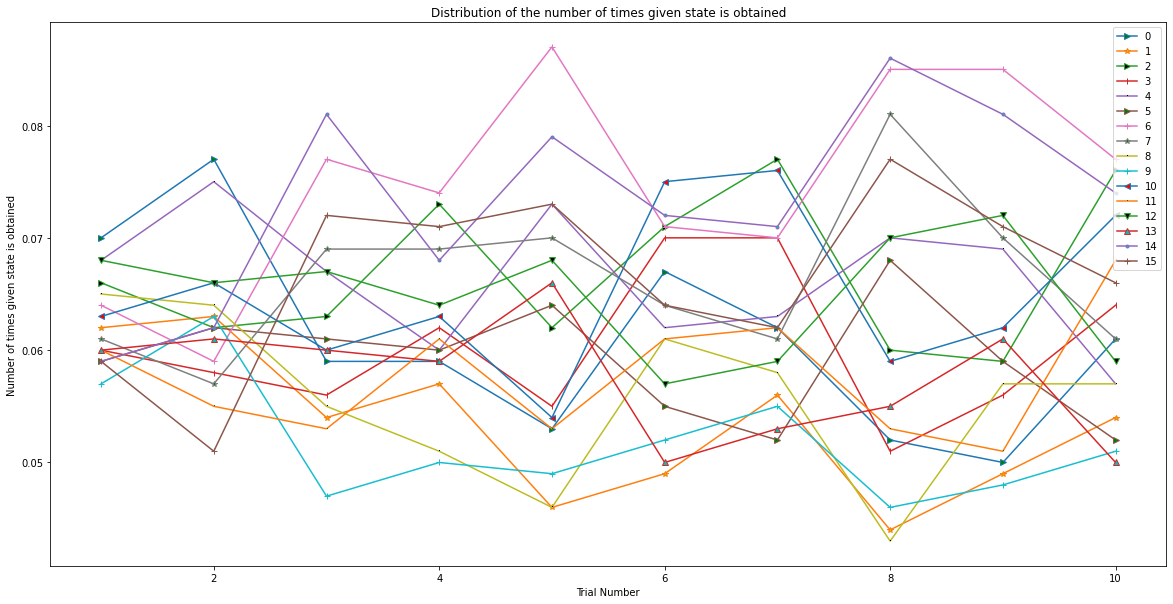

In [60]:
plotSimulation(allCounts, 4, 10, 8192)

#Ignore the Estimated mean. Here, it is giving us the mean of probabilities rather than the mean of counts

The plot seems chaotic, and all numbers are present at different probability for different trials. There are some patterns, like the number 9 (1001) and 1 (0001) are usually towards the lower end, while the numbers 6 (0110) and 4 (0100) are usually towards the upper end. We leave the analysis here, although one can plot the bit-wise probability for each bit-position to determine how noise affects individual bits.